# Predator-prey model of the UK retail market with stochastic noise

$$
\frac{dx(t)}{dt}=x*(\alpha-\beta*y)
$$

$$
\frac{dy(t)}{dt}=-y*(\gamma-\beta*x)
$$

Assumptions of this simple form of the model are:

1. Corporations find many  companies to merge with and acquire. 

2. Corporations merge only with the companies 

3. rate of change of population is proportional to its size 

4. the retail environment does not change


The parameters can be interepreted as:

α is the growth  rate of businees in absence of mergers.

β is the death rate of companies due to merger, acquires and bankrupcy rate

γ is the natural rate of bankrupcy rate of corporations



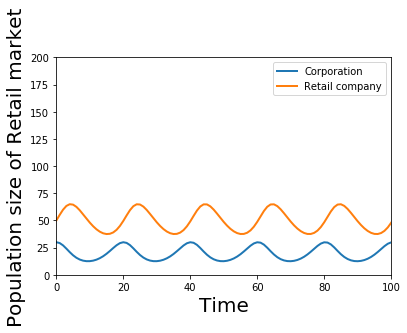

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as npy
import random

from scipy.integrate import odeint

def LotkaVolterra(state,t):
  x = state[0]
  y = state[1]
  alpha = 0.5
  beta =  0.01
  gamma = 0.2
  xd = x*(alpha - beta*y)
  yd = -y*(gamma - beta*x)
  return [xd,yd]

t = range(0,300,1)
#state0 = [10,30]
state0 = [30,50]
state = odeint(LotkaVolterra,state0,t)

line = plt.plot(t, state, '-', linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Population size of Retail market', fontsize= 20)
plt.legend(['Corporation','Retail company'])
plt.axis([0, 100, 0, 200])
plt.show()


### Stochastic prey-predator model of the UK Retail Market


Three different reactions can happen:

1. UK Retail companies grow with Rate =  \alpha*x (new x=x+1)
2. mergers, acquitision, bankrupty rate =  \bete*x*y   (new x=x-1, new y=y+1) 
3. Corporations fail with rate = e \gamma*y (new y=y-1)

In [3]:
def react1_updater(molCount):
    """
    This function updates the molecule count should reaction
    number 1 happen. Input parameter is the list of current
    molecule counts and we return the new molecule counts.
    """
    molCount[0] += 1      # update companies
    return molCount


def react2_updater(molCount):
    """
    This function updates the molecule count should reaction
    number 2 happen. 
    """
    molCount[0] -= 1      # update companies
    molCount[1] += 1      # update conglomerates
    return molCount


def react3_updater(molCount):
    """
    This function updates the molecule count should reaction
    number 3 happen. 
    """
    molCount[1] -= 1      # update conglomerates
    return molCount



def compute_propensities(molCount,rates):
    """
    This function returns the reaction propensities according
    to the current molecule counts (step 1 on 2345 in Gillespie's
    paper 1977 paper). Since we have two reactions we return
    a list with two values. Per definition of the propensities
    in Gillespie's paper we return the propensity k1*A*B for 
    reaction 1 and k2*C for reaction 2 where A, B, and C are the 
    instantaneous molecule counts and k1, k2 the reaction rates.
    """
    
    return (rates[0]*molCount[0], 
            rates[1]*molCount[0]*molCount[1],
            rates[2]*molCount[1]) 


In [4]:
    import random as rng
    import math
    # initial conditions and variables

    x0 = 50   # initial number of companies
    x1 = 50  # initial number of conglomerates

    # reaction rates
    alpha = 0.5
    beta =  0.01
    gamma = 0.2
    # parameters
    maxTime = 100.0   # maximum simulation time
    # initialize time, random number generator,
    # initial molecule counts, and molecule count update
    # functions
    #rng.seed(124213)
    time       = 0.0
    iteration  = 0                               # iteration count
    outputFreq = 100                            # output frequency
    molCounts  = [x0,x1]
    rates      = [alpha,beta,gamma]           # need to convert 
    updaters   = [react1_updater,react2_updater,react3_updater]
    X=[x0];
    Y=[x1];
    T=[time];
    # we simulate until we hit our maximum simulation time
    while time < maxTime:
        
        # compute the propensities a_i for each reaction
        # and the sum a_0
        a_i = compute_propensities(molCounts, rates)
        a_0 = sum(a_i)
        
        if a_0==0:
            break
        else:
            # pick a random number, compute the time increment
            # and update t (equation 21a in Gillespie's paper)
            rand_1 = rng.random()
            tau    = 1.0/a_0 * math.log(1/rand_1)
            time  += tau

            # find the reaction to execute (equation 21b in
            # Gillespie's paper). We need a second random number
            # here. We don't really need the while loop here since
            # we only have two possible reactions but we do it anyway
            # to keep it more general. 
            rand_2    = rng.random()
            threshold = a_0 * rand_2
        
            summation = 0
            count     = 0
            while threshold > summation:
                summation += a_i[count]
                count += 1

            # update molecule counts by calling the proper updater
            # function. Note, arrays in python are zero index based
            # hence we need count-1 to access the proper updater.
            molCounts = updaters[count-1](molCounts)

            # dump data every outputFreq iteration
            # we also print a short progess message 
            if (iteration % outputFreq) == 0:
                X.append(molCounts[0])
                Y.append(molCounts[1])
                T.append(time)
                #write_data_to_output(fileHandles, time, molCounts)
                #print("iteration %d   time %5.4g" % (iteration, time))   

            iteration += 1   

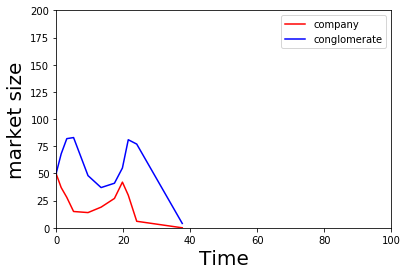

In [10]:
line = plt.plot(T, X, '-r')
#plt.hold(True)
plt.plot(T, Y, '-b')
plt.xlabel('Time', fontsize=20)
plt.ylabel('market size', fontsize= 20)
plt.legend(['retail company','corporation'])
plt.axis([0, 100, 0, 200])
plt.show()

Modelling the UK retail Market as a Predator-Prey Systems in Python
In this notebook will use a mathematical model for predator-prey systems. The model is the Lotka-Volterra model.

First we will build a deterministic, idealized model for the predator-prey systems. Towards the end of the notebook, we will then introduce stochastics into the equations - so that the model more accurately captures the noise found in real world scenarios.

The Lotka-Volterra Equations
alt text

Defining the equations
From the above equation, the parameters can be thought of as the following:

𝑑𝑥𝑑𝑡 = growth rate of retail companies
𝑑𝑦𝑑𝑡 = growth rate of corporations

𝑥 = retail company population

𝑦 = corporate population

𝛼 = growth rate of retail companies

𝛽 = death rate of companies due to predatation from corporations
𝛾 = natural death rate of retail companies
𝛿 = factor describing how many consumed retail companies create a new corporation
Physical Meaning of the Equations
From the above equations, we can conclude that the Lotka-Volterra model makes several assumptions for the dynamics of predator-prey systems. Some of which are as follows:

The retail company population is provided with limitless customers
The rate of change of the populations are proportional to their size
The corporations acquire only the retail companies, and are entirely dependent on them for growth
The foxes have unlimited appetite
Modelling Stochasticisty
In introducing stochasticity to our models, there are numerous ways that we can choose to model randomness. In this notebook, we will model our noise using a very simple uniform distribution with a mean about zero.

For further work, it may be worthwhile to model the noise using Brownian motion, and then comparing this to the white noise randomness generated by the Weiner equation, and then finally model the noise using the coloured noise generated by the Levy equations.

Deterministic Lotka-Volterra Model
Here we wil

l simulate the behaviour of retail company and corporate populations using the deterministic Lotka-Volterra model, without any stochastic noise added to the simulation.

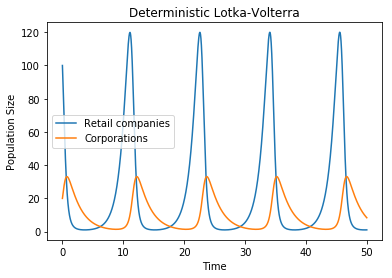

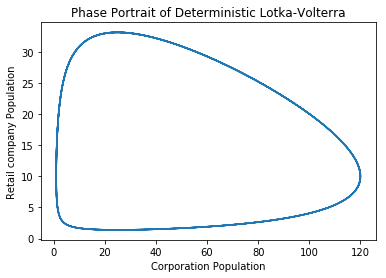

In [5]:


# timestep determines the accuracy of the euler method of integration
timestep = 0.0001
# amplitude of noise term
amp = 0.00
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize retail companies (x) and corporations (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

#"""" definition of lotka-volterra parameters"""
# birth rate of retail companies
a = 1
# death rate of retail corporations due to predation
b = 0.1
# natural death rate of corporations
c = 0.5
# factor that describes how many acquired retail comporations give rise to a new corporation
d = 0.02

#""" euler integration """

# initial conditions for the retail company (x) and corporate (y) populations at time=0
x.append(100)
y.append(20)

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    x.append(next_x)
    y.append(next_y)

#""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporation Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporation Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Birth Rate')
    plt.show()

Discussion
From the first graph, we observe an oscillatory relationship between the retail companies and the corpoations. As the retail company population grows in size, the corporations have more to acquire. This creates more corporations. As there are now more corporations, they more rapidly consume the retail company population. As the retail company population is depleted by the large number of corporations, the corporations have less to acquire and are therefore depleted as well.

From the second graph, we observe a closed loop for the phase portrait. This demonstrates the stability of these differential equations, subject to the Euler method.

Errors in the Simulation
The errors in our numerical simulation are due to the integration method chosen for evaluating the retail company and corporate populations.

The numerical integration method chosen was the Euler method. Inherrent errors within this method include the stepsize chosen, which contributes to a discretization error, and any rounding errors.

The dominant error in our program is the discretization error, which can be minimized by decreasing the step-size. It is worth noting that when the step-size is larger, the closed-loop observed becomes a spiral, and the populations diverge. This illustrates that the equations are mathematically "unstable".

This can be further illustrated by evaluating the Jacobian matrix of the populations.

Steady States of the Populations
The steady state of the populations arises when the growth rates are equal to zero.

At this state of equilibrium, we arive at two fixed points for the retail company and corporate populations:

𝑥=𝑐𝑑
𝑦=𝑎𝑏
Inputting these values as the initial conditions, the populations remain steady over time.

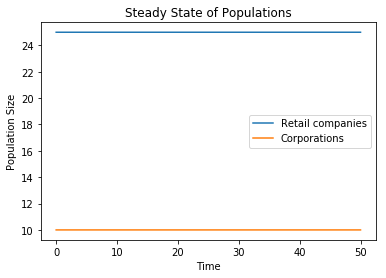

In [6]:
# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize retail companies (x) and corporations (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

#"""" definition of lotka-volterra parameters"""
# birth rate of retail companies
a = 1
# death rate of retail companies due to predation
b = 0.1
# natural death rate of corporations
c = 0.5
# factor that describes how many acquired retail companies give rise to a new corporation
d = 0.02

#""" euler integration """

# initial conditions for the retail company (x) and corporaion (y) populations at time=0
x.append(c/d)
y.append(a/b) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y)

#""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Steady State of Populations')
    plt.show()

Perturbing the Retail Companies Population out of Steady State
Here we start with initial populations that correspond to the steady state. However, as we iterate through the Euler method, we peturb the newly created retail company populations by a stochastic term.

We observe that the noise generated by the stochastic term perturbs the retail campany population out of its steady state, which then causes the corporation population to start oscillating in sync with the retail company population.

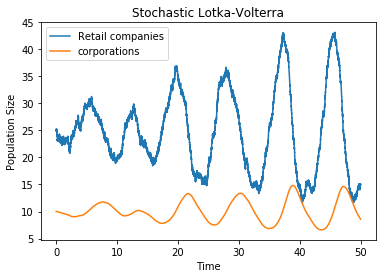

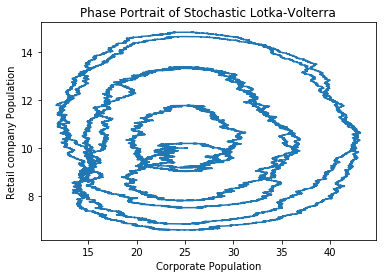

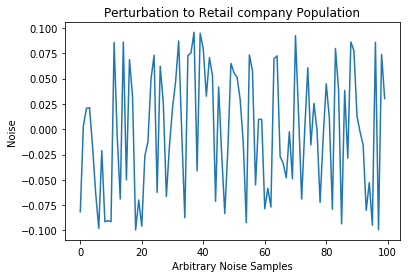

In [7]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as npy
import random

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.1
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize retail companies (x) and corporations (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

#"""" definition of lotka-volterra parameters"""
# birth rate of retail companies
a = 1
# death rate of retail companies due to predation
b = 0.1
# natural death rate of corporations
c = 0.5
# factor that describes how many acquied retail companies give rise to a new corporation
d = 0.02

#""" euler integration """

# initial conditions for the retail company (x) and corporation (y) populations at time=0
x.append(c/d)
y.append(a/b) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y)

#""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporate Population')
    plt.ylabel('Retail companies Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'corporations'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporate Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Retail company Population')
    plt.show()

Applying noise to the Lotka-Volterra Parameters
Here, we apply noise to the birth rate of retail companies. That is, noise is specifically applied to the parameter "a" in the lotka-volterra equations.

Stochastic Birth Rate
Here, the value of the birth rate a is defined to be stochastic in the integration.

We define a as follows:

a = a + StochasticTerm

Therefore, the value of a has a mean about the deterministic value of a, but it has an added noise to it that varies proportionally with the birth rate.

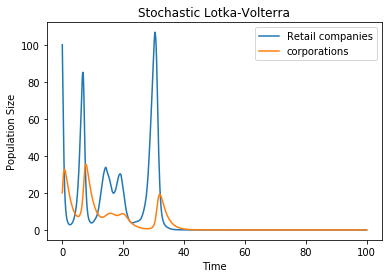

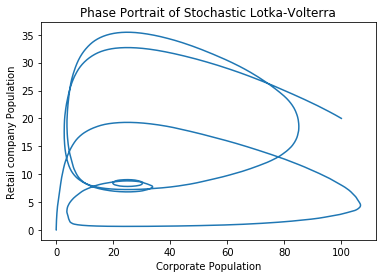

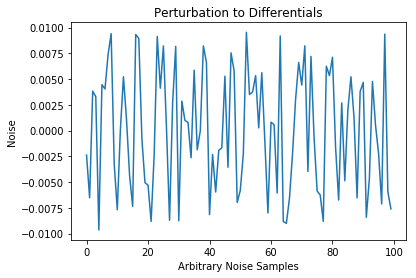

In [12]:

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.01
# the time at which the simulation ends
end_time = 100

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize retail companies (x) and corporations (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

#"""" definition of lotka-volterra parameters"""
# birth rate of retail companies
a = 1
# death rate of retail companies due to acquistions
b = 0.1
# natural death rate of corporations
c = 0.5
# factor that describes how many acquired retail companies give rise to a new corporation
d = 0.02

#""" euler integration """

# initial conditions for the retail company (x) and corporate (y) populations at time=0
x.append(100)
y.append(20) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
    a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x)
    y.append(next_y)

#""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporate Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'corporations'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporate Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Differentials')
    plt.show()

Adding noise to populations after integration
After computing the value of x and y through the Euler method, I then add noise to these values and store them. The differentials in the next iteration of the Euler method are then evaluated using these stochastic values of x and y.

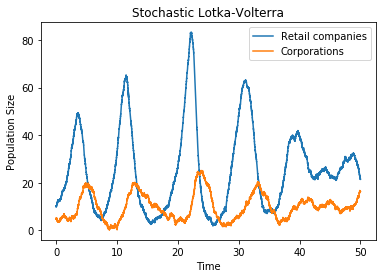

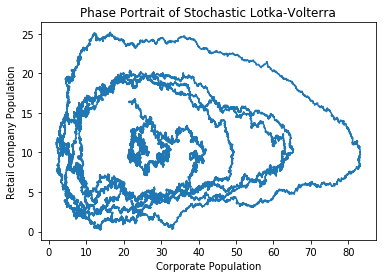

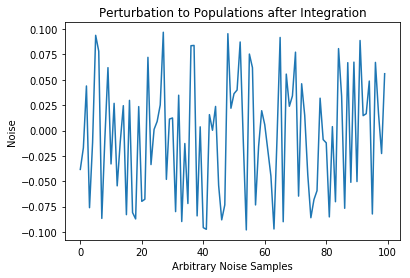

In [13]:

# timestep determines the accuracy of the euler method of integration
timestep = 0.001
# amplitude of noise term
amp = 0.1
# the time at which the simulation ends
end_time = 50

# creates a time vector from 0 to end_time, seperated by a timestep
t = npy.arange(0,end_time,timestep)

# intialize retail companies (x) and corporations (y) vectors
x = []
y = []

# noise term to perturb differential equations
def StochasticTerm(amp):
    return (amp * random.uniform(-1,1))

"""" definition of lotka-volterra parameters"""
# birth rate of retail companies
a = 1
# death rate of retail companies due to acquistion
b = 0.1
# natural death rate of corporations
c = 0.5
# factor that describes how many acquired retail companies give rise to a new corporations
d = 0.02

""" euler integration """

# initial conditions for the retail company (x) and corporate (y) populations at time=0
x.append(10)
y.append(5) 

# forward euler method of integration
# a perturbbation term is added to the differentials to make the simulation stochastic
for index in range(1,len(t)):
    
    # make parameters stochastic
#     a = a + StochasticTerm(amp)
#     b = b + StochasticTerm(amp)
#     c = c + StochasticTerm(amp)
#     d = d + StochasticTerm(amp)
    
    # evaluate the current differentials
    xd = x[index-1] * (a - b*y[index-1])
    yd = -y[index-1]*(c - d*x[index-1])
    
    # evaluate the next value of x and y using differentials
    next_x = x[index-1] + xd * timestep
    next_y = y[index-1] + yd * timestep

    # add the next value of x and y 
    # add noise to x and y
    x.append(next_x + StochasticTerm(amp))
    y.append(next_y + StochasticTerm(amp))

#""" visualization """

if amp == 0:    
    # visualization of deterministic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Deterministic Lotka-Volterra')
    plt.show()

    # deterministic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporate Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Deterministic Lotka-Volterra')
    plt.show()
    
else:
    # visualization of stochastic populations against time
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('Time')
    plt.ylabel('Population Size')
    plt.legend(('Retail companies', 'Corporations'))
    plt.title('Stochastic Lotka-Volterra')
    plt.show()

    # stochastic phase portrait
    plt.plot(x,y)
    plt.xlabel('Corporate Population')
    plt.ylabel('Retail company Population')
    plt.title('Phase Portrait of Stochastic Lotka-Volterra')
    plt.show()
    
    # noise term visualization
    noise = []
    n =[]
    for sample in range(100):
        noise.append(StochasticTerm(amp))
        n.append(sample)

    plt.plot(n, noise)
    plt.xlabel('Arbitrary Noise Samples')
    plt.ylabel('Noise')
    plt.title('Perturbation to Populations after Integration')
    plt.show()

Discussion
Here, we observe that the populations start out relatively stable, but as the simulation evolves the populations begin to oscillate with greater and greater amplitude as the retail company population is continuously subject to the uniformly distributed noise.

Once the retail company population is perturbed out of its steady state, the corporate population experiences a non-zero change to its differential, which perturbs it also out of its steady state. Therefore, if a small change is made to only one species, the other species will also be perturbed out of its steady state. This then causes both species to exhibt the oscillatory behaviour observed earlier in this notebook.

Comparison of Model with Empirical Evidence
Here is a graph of an empircally recorded predator-prey system showing company acquistions from 1990 - 2016:

<img src="acquistions.gif">

We observe stochasticisty in the discrete data points collected, and a oscillatory relationship between the populations of the two species. This is in agreement with the Lotka-Volterra models constructed above.

Conclusions
In this notebook we have discussed the Lotka-Volterra model for the dynamics of predator-prey systems. In the first section, we created a model which illustrated the oscilatory relationship between the populations. The obtained results agree with the oscilatory relationship found in market statistics, as illustrated by the empircal evidence above.

We then evaluated the steady states of the populations, where neither population changed overtime.

Towards the end of the notebook, we introduced stochastic noise into our model and showed that by introducing noise to one of the steady populations, both species are perturbed out of their steady states, and begin to oscillate.

Further Improvements
Include a model of seasons, in which the stochastic lotka-volterra rate parameters remain constant for a series of cycles, rather than fluctuating with each time-step.
Consider perturbing all the parameters to see how they behave.
Try to skew the noise


References
[1] - Freedman, H. I. (1980). Deterministic Mathematical Models in Population Ecology. Marcel Dekker.

[2] - Brauer, F.; Castillo-Chavez, C. (2000). Mathematical Models in Population Biology and Epidemiology. Springer-Verlag.

[3] - Hoppensteadt, F. (2006). "Predator-prey model". Scholarpedia. p. 1563.